The avg of hidden layer activations is 0.50189497029
Epoch 0 training complete
The avg of hidden layer activations is 0.464580226798
Epoch 1 training complete
The avg of hidden layer activations is 0.452146954767
Epoch 2 training complete
The avg of hidden layer activations is 0.448898205696
Epoch 3 training complete
The avg of hidden layer activations is 0.443718044847
Epoch 4 training complete
The avg of hidden layer activations is 0.44330053152
Epoch 5 training complete
The avg of hidden layer activations is 0.443271843174
Epoch 6 training complete
The avg of hidden layer activations is 0.442387406002
Epoch 7 training complete
The avg of hidden layer activations is 0.442312730284
Epoch 8 training complete
The avg of hidden layer activations is 0.440926186812
Epoch 9 training complete
The avg of hidden layer activations is 0.442223928891
Epoch 10 training complete
The avg of hidden layer activations is 0.442272146802
Epoch 11 training complete
The avg of hidden layer activations is 0

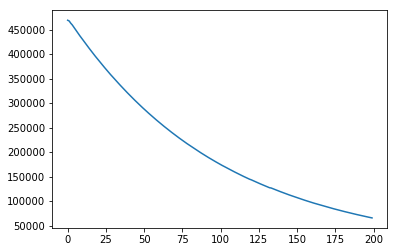

In [3]:
import mnist_loader
import matplotlib.pyplot as plt
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()

# print(training_data)
import network2_AE_1
from data_expander import data_expander
import numpy as np
data_range = 100
training_data = list(training_data)[:data_range]
# print(np.shape(training_data))
# # print(training_data[0][0].shape)  # This is how the data is structured: lists in lists. Each list contains the data and one-hot vector
# training_data = data_expander(training_data,5)
# print(np.shape(training_data))
hidden_dim = 1000
net = network2_AE_1.Network([784,hidden_dim,784], cost = network2_AE_1.QuadraticCost)
results = net.SGD(training_data, 200, data_range, 0.1, lmbda = 5.0, evaluation_data=validation_data, monitor_training_cost = True, monitor_evaluation_accuracy=False, rho = 0.005, beta = 10)

plt.figure()
plt.plot(range(len(results[2])),results[2])
plt.show()




In [8]:
print(sum(sum(net.weights[0])))
print(sum(sum(net.weights[1])))

# Dang, the weights are just getting really small! 

-1152.04383816
-105348.441492


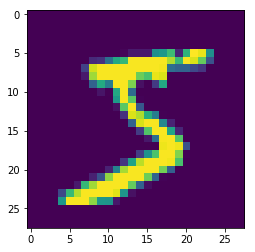

In [39]:
import matplotlib.pyplot as plt
plt.imshow(training_data[0][0].reshape(28,28))
plt.show()

In [40]:
output = net.feedforward(training_data[0][0])

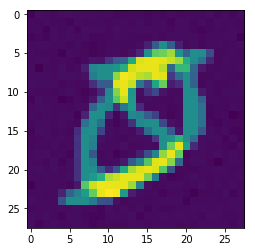

In [41]:
plt.imshow(output.reshape(28,28))
plt.show()

In [7]:
print(max(net.weights[0].reshape(784000,1)))  # The max is very small.

[ 0.15179999]


In [58]:
def KL(rho, rho_hat):
    KL_divergence = sum(rho*np.log10(rho/rho_hat) + (1-rho)*np.log10((1-rho)/(1-rho_hat)))
    return KL_divergence
rho = np.array([1,2,3,2,1,2,3,4])/10
rho_hat = np.array([1,2,3,1,1,2,3,4])/10

print(sum(rho*np.log10(rho/rho_hat) + (1-rho)*np.log10((1-rho)/(1-rho_hat))))

print(KL(rho, rho_hat))


0.0192839811749
0.0192839811749


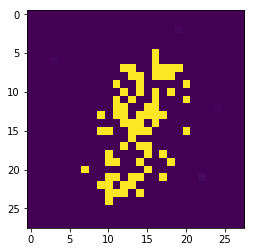

In [5]:
import matplotlib.pyplot as plt
output = net.feedforward(training_data[4][0])
plt.imshow(output.reshape(28,28))
plt.show()

# hmm, perhaps we are getting somewhere...

The avg of hidden layer activations is 5.0566065725


ValueError: operands could not be broadcast together with shapes (1000,100) (1000,) 

In [10]:
import mnist_loader
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()


import numpy as np
data_range = 100
training_data = list(training_data)[:data_range]

(100, 784, 1)
(784, 100)


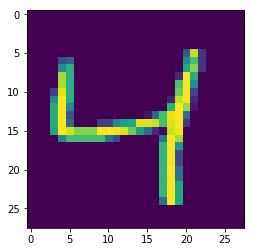

In [29]:
# print(training_data[0])
import matplotlib.pyplot as plt

unlabeled_data = np.array([data[0] for data in training_data])
print(unlabeled_data.shape)
X = unlabeled_data.T.reshape(784,-1) # each example stored in a column
print(X.shape)

plt.imshow(X.T[2].reshape(28,28))
plt.show()

In [22]:
data = []
for x,y in training_data:
    data.append(x)

data = np.array(data) 
print(data.shape)

(100, 784, 1)
